In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

- For all of the models you create, choose a threshold that optimizes for accuracy.

In [37]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

import acquire
import prepare

In [38]:
df = prepare.prep_titanic()
df

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?




In [39]:
df.age.isnull().sum()

177

In [40]:
df.age = df.age.fillna(df.age.mean())
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.000000,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.000000,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.000000,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.000000,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.000000,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.000000,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,29.699118,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.000000,0,0,30.0000,C,1,1,0,0


In [41]:
df.age.isnull().sum()

0

In [42]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [43]:
(df.survived == 0).mean()

0.6161616161616161

In [44]:
train, validate, test = prepare.split_data(df, 'survived')
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,29.000000,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,42.000000,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,55.000000,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,29.699118,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,22.000000,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,52.000000,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,29.699118,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,32.000000,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,51.000000,0,0,8.0500,S,1,1,0,1


In [72]:
X_train1 = train[['pclass','age','fare']]
X_validate1 = validate[['pclass','age','fare']]
X_test1 = test[['pclass','age','fare']]

In [73]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [74]:
#make the model
logit1 = LogisticRegression()
logit1

LogisticRegression()

In [76]:
#fit the model
logit1.fit(X_train1, y_train)

LogisticRegression()

In [77]:
#score it
logit1.score(X_train1, y_train)

0.7059925093632958

In [78]:
#take a look at predictions
y_pred = logit1.predict(X_train1)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
# View raw probabilities (output from the model)
y_pred_proba = logit1.predict_proba(X_train1).round(2)[:5]
y_pred_proba

array([[0.77, 0.23],
       [0.31, 0.69],
       [0.51, 0.49],
       [0.33, 0.67],
       [0.73, 0.27]])

In [80]:
#classification report
print(classification_report(y_train, logit1.predict(X_train1)))

              precision    recall  f1-score   support

           0       0.71      0.87      0.79       329
           1       0.68      0.44      0.53       205

    accuracy                           0.71       534
   macro avg       0.70      0.66      0.66       534
weighted avg       0.70      0.71      0.69       534



In [81]:
#coef
logit1.coef_

array([[-0.92469432, -0.02949009,  0.00226142]])

In [82]:
#columns
X_train1.columns

Index(['pclass', 'age', 'fare'], dtype='object')

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.




In [83]:
X_train2 = train[['pclass','age','fare', 'sex_male']]
X_validate2 = validate[['pclass','age','fare', 'sex_male']]
X_test2 = test[['pclass','age','fare', 'sex_male']]

In [84]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [85]:
#make the model
logit2 = LogisticRegression()
logit2

LogisticRegression()

In [86]:
#fit the model
logit2.fit(X_train2, y_train)

LogisticRegression()

In [87]:
#score it
logit2.score(X_train2, y_train)

0.8052434456928839

In [88]:
#take a look at predictions
logit2.predict(X_train2)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [391]:
# View raw probabilities (output from the model)
logit2.predict_proba(X_train2).round(2)

array([[0.91, 0.09],
       [0.12, 0.88],
       [0.68, 0.32],
       ...,
       [0.91, 0.09],
       [0.95, 0.05],
       [0.14, 0.86]])

In [90]:
#classification report
print(classification_report(y_train, logit2.predict(X_train2)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       329
           1       0.76      0.72      0.74       205

    accuracy                           0.81       534
   macro avg       0.80      0.79      0.79       534
weighted avg       0.80      0.81      0.80       534



In [91]:
#coef
logit2.coef_

array([[-1.14920042e+00, -2.79796794e-02, -1.06846138e-03,
        -2.59942200e+00]])

In [92]:
#columns
X_train2.columns

Index(['pclass', 'age', 'fare', 'sex_male'], dtype='object')

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


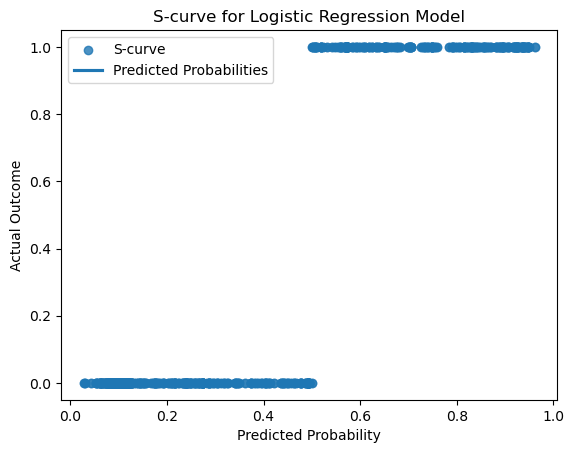

In [406]:

y_pred = logit2.predict(X_train2)
y_pred_proba = logit2.predict_proba(X_train2)
y_pred_proba = np.array([i[1] for i in y_pred_proba])


# Plot the S-curve
sns.regplot(x = y_pred_proba, y = y_pred, logistic=True, ci=None)

# Create scatter plot of predicted probabilities vs. actual outcomes
plt.scatter(y_pred_proba, y_pred , alpha=0.5)


# Add axis labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Outcome')
plt.title('S-curve for Logistic Regression Model')

# Add legend
plt.legend(['S-curve', 'Predicted Probabilities'])

plt.show()





In [144]:
X_train3 = train[['pclass','parch', 'fare', 'sex_male','alone']]
X_validate3 = validate[['pclass','parch', 'fare', 'sex_male','alone']]
X_test3 = test[['pclass','parch', 'fare', 'sex_male','alone']]

In [145]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [146]:
#make the model
logit3 = LogisticRegression(C=0.5)
logit3

LogisticRegression(C=0.5)

In [147]:
#fit the model
logit3.fit(X_train3, y_train)

LogisticRegression(C=0.5)

In [148]:
#score it
logit3.score(X_train3, y_train)

0.7940074906367042

In [149]:
#take a look at predictions
logit3.predict(X_train3)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [150]:
# View raw probabilities (output from the model)
logit3.predict_proba(X_train3).round(2)[:5]

array([[0.89, 0.11],
       [0.1 , 0.9 ],
       [0.59, 0.41],
       [0.59, 0.41],
       [0.89, 0.11]])

In [151]:
#classification report
print(classification_report(y_train, logit3.predict(X_train3)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       329
           1       0.76      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.79      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



In [152]:
#coef
logit3.coef_

array([[-8.90417761e-01, -1.76443394e-01,  3.76601982e-04,
        -2.46729228e+00, -3.03176406e-01]])

In [153]:
#columns
X_train3.columns

Index(['pclass', 'parch', 'fare', 'sex_male', 'alone'], dtype='object')

Try out other combinations of features and models.



In [183]:
X_train4 = train[['pclass','age','sex_male','alone']]
X_validate4 = validate[['pclass','age', 'sex_male','alone']]
X_test4 = test[['pclass','age', 'sex_male','alone']]

In [184]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [185]:
#make the model
logit4 = LogisticRegression()
logit4

LogisticRegression()

In [186]:
#fit the model
logit4.fit(X_train4, y_train)

LogisticRegression()

In [187]:
#score it
logit4.score(X_train4, y_train)

0.8033707865168539

In [188]:
#take a look at predictions
logit4.predict(X_train4)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [189]:
# View raw probabilities (output from the model)
logit4.predict_proba(X_train4).round(2)[:5]

array([[0.91, 0.09],
       [0.1 , 0.9 ],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.89, 0.11]])

In [190]:
#classification report
print(classification_report(y_train, logit4.predict(X_train4)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       329
           1       0.76      0.71      0.74       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534



In [191]:
#coef
logit4.coef_

array([[-1.11880386, -0.02785154, -2.60060093,  0.03843894]])

In [192]:
#columns
X_train4.columns

Index(['pclass', 'age', 'sex_male', 'alone'], dtype='object')

In [193]:
X_train5 = train[['pclass','age','sex_male','sibsp']]
X_validate5 = validate[['pclass','age', 'sex_male','sibsp']]
X_test5 = test[['pclass','age', 'sex_male','sibsp']]

In [194]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [195]:
#make the model
logit5 = LogisticRegression()
logit5

LogisticRegression()

In [196]:
#fit the model
logit5.fit(X_train5, y_train)

LogisticRegression()

In [197]:
#score it
logit5.score(X_train5, y_train)

0.7865168539325843

In [198]:
#take a look at predictions
logit5.predict(X_train5)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [199]:
# View raw probabilities (output from the model)
logit5.predict_proba(X_train5).round(2)[:5]

array([[0.9 , 0.1 ],
       [0.09, 0.91],
       [0.69, 0.31],
       [0.49, 0.51],
       [0.87, 0.13]])

In [200]:
#classification report
print(classification_report(y_train, logit5.predict(X_train5)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       329
           1       0.73      0.71      0.72       205

    accuracy                           0.79       534
   macro avg       0.77      0.77      0.77       534
weighted avg       0.79      0.79      0.79       534



In [201]:
#coef
logit5.coef_

array([[-1.11653449, -0.03458524, -2.71208239, -0.34425289]])

In [202]:
#columns
X_train5.columns

Index(['pclass', 'age', 'sex_male', 'sibsp'], dtype='object')

Use you best 3 models to predict and evaluate on your validate sample.


In [217]:
# 'pclass','age','fare', 'sex_male'
print('Train:', logit2.score(X_train2, y_train))
print('Validate:', logit2.score(X_validate2, y_validate))
print('Difference:', (logit2.score(X_train2, y_train))-(logit2.score(X_validate2, y_validate)))

Train: 0.8052434456928839
Validate: 0.7808988764044944
Difference: 0.02434456928838946


In [215]:
# 'pclass','parch', 'fare', 'sex_male','alone'
print('Train:', logit3.score(X_train3, y_train))
print('Validate:', logit3.score(X_validate3, y_validate))
print('Difference:',(logit3.score(X_train3, y_train))-(logit3.score(X_validate3, y_validate)))

Train: 0.7940074906367042
Validate: 0.7921348314606742
Difference: 0.0018726591760299671


In [216]:
# 'pclass','age','sex_male','alone'
print('Train:', logit4.score(X_train4, y_train))
print('Validate:', logit4.score(X_validate4, y_validate))
print('Difference:', (logit4.score(X_train4, y_train))-(logit4.score(X_validate4, y_validate)))

Train: 0.8033707865168539
Validate: 0.7808988764044944
Difference: 0.022471910112359494



Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [225]:
# 'pclass','parch', 'fare', 'sex_male','alone'
print('Train:', logit3.score(X_train3, y_train))
print('Validate:', logit3.score(X_validate3, y_validate))
print('Difference:',(logit3.score(X_train3, y_train))-(logit3.score(X_validate3, y_validate)))
print('Test:', logit3.score(X_test3, y_test))
print('Difference between Train & Test:', (logit3.score(X_train3, y_train))-(logit3.score(X_test3, y_test)))


Train: 0.7940074906367042
Validate: 0.7921348314606742
Difference: 0.0018726591760299671
Test: 0.7877094972067039
Difference between Train & Test: 0.006297993430000259


# Bonus1 
How do different strategies for handling the missing values in the age column affect model performance?

 - above set the null values in age to the mean value. I will try setting them to min, and max, and deleting and see the difference 

## age as min

In [227]:
df = prepare.prep_titanic()
df

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [228]:
df.age.isnull().sum()

177

In [229]:
df.age = df.age.fillna(df.age.min())
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.00,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.00,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.00,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.00,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.00,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.00,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.00,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,0.42,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.00,0,0,30.0000,C,1,1,0,0


In [230]:
df.age.isnull().sum()

0

In [231]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [249]:
train, validate, test = prepare.split_data(df, 'survived')
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,29.0,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,42.0,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,55.0,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,80.0,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,22.0,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,52.0,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,80.0,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,32.0,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,51.0,0,0,8.0500,S,1,1,0,1


In [250]:
X_train6 = train[['pclass','age','fare', 'sex_male']]
X_validate6 = validate[['pclass','age','fare', 'sex_male']]
X_test6 = test[['pclass','age','fare', 'sex_male']]

In [251]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [252]:
#make the model
logit6 = LogisticRegression()
logit6

LogisticRegression()

In [253]:
#fit the model
logit6.fit(X_train6, y_train)

LogisticRegression()

In [254]:
#score it
logit6.score(X_train6, y_train)

0.7827715355805244

## age as max

In [255]:
df = prepare.prep_titanic()
df

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [256]:
df.age.isnull().sum()

177

In [257]:
df.age = df.age.fillna(df.age.max())
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,80.0,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [258]:
df.age.isnull().sum()

0

In [259]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [260]:
train, validate, test = prepare.split_data(df, 'survived')
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,29.0,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,42.0,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,55.0,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,80.0,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,22.0,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,52.0,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,80.0,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,32.0,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,51.0,0,0,8.0500,S,1,1,0,1


In [261]:
X_train7 = train[['pclass','age','fare', 'sex_male']]
X_validate7 = validate[['pclass','age','fare', 'sex_male']]
X_test7 = test[['pclass','age','fare', 'sex_male']]

In [262]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [263]:
#make the model
logit7 = LogisticRegression()
logit7

LogisticRegression()

In [264]:
#fit the model
logit7.fit(X_train7, y_train)

LogisticRegression()

In [265]:
#score it
logit7.score(X_train7, y_train)

0.7827715355805244

- instead of setting age to the mean age, min and max both ways decreased the accuracy by ~2%.

## dropping rows with null values in age

In [266]:
df = prepare.prep_titanic()
df

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [267]:
df.age.isnull().sum()

177

In [271]:
df = df.dropna(subset=['age'])
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Q,0,0,1,0
886,886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [272]:
df.age.isnull().sum()

0

In [ ]:
train, validate, test = prepare.split_data(df, 'survived')
train

In [273]:
X_train8 = train[['pclass','age','fare', 'sex_male']]
X_validate8 = validate[['pclass','age','fare', 'sex_male']]
X_test8 = test[['pclass','age','fare', 'sex_male']]

In [274]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [276]:
#make the model
logit8 = LogisticRegression()
logit8

LogisticRegression()

In [277]:
#fit the model
logit8.fit(X_train8, y_train)

LogisticRegression()

In [278]:
#score it
logit8.score(X_train8, y_train)

0.7827715355805244

- it seems that setting age to the mean provides the highest accuracy score

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000


- baseline

In [349]:
logit3.score(X_train3, y_train)

0.7940074906367042

- C = 0.01

In [350]:
logit_001c = LogisticRegression(C=.01)

In [351]:
logit_001c.fit(X_train3, y_train)

LogisticRegression(C=0.01)

In [352]:
logit_001c.score(X_train3, y_train)

0.6891385767790262

In [353]:
logit_001c.score(X_validate3, y_validate)

0.7247191011235955

- C = 0.1

In [354]:
logit_01c = LogisticRegression(C=.1)

In [355]:
logit_01c.fit(X_train3, y_train)

LogisticRegression(C=0.1)

In [356]:
logit_01c.score(X_train3, y_train)

0.7827715355805244

In [357]:
logit_01c.score(X_validate3, y_validate)

0.7865168539325843

- C = 1

In [358]:
logit_1 = LogisticRegression(C=1)

In [359]:
logit_1.fit(X_train3, y_train)

LogisticRegression(C=1)

In [360]:
logit_1.score(X_train3, y_train)

0.7940074906367042

In [361]:
logit_1.score(X_validate3, y_validate)

0.7921348314606742

- C = 10

In [362]:
logit_10 = LogisticRegression(C=10)

In [363]:
logit_10.fit(X_train3, y_train)

LogisticRegression(C=10)

In [364]:
logit_10.score(X_train3, y_train)

0.7940074906367042

In [365]:
logit_10.score(X_validate3, y_validate)

0.7921348314606742

- C = 100

In [366]:
logit_100 = LogisticRegression(C=100)

In [367]:
logit_100.fit(X_train3, y_train)

LogisticRegression(C=100)

In [368]:
logit_100.score(X_train3, y_train)

0.7940074906367042

In [369]:
logit_100.score(X_validate3, y_validate)

0.7921348314606742

- C = 1000

In [370]:
logit_1000 = LogisticRegression(C=1000)

In [371]:
logit_1000.fit(X_train3, y_train)

LogisticRegression(C=1000)

In [372]:
logit_1000.score(X_train3, y_train)

0.7940074906367042

In [373]:
logit_1000.score(X_validate3, y_validate)

0.7921348314606742